This notebook is an attempt to transform the 500 Cities dataset that I created in my last Jupyter notebook for 500 cities, and then to map it to an existing shapefile from the 500 cities dataset.

Note: I'm only updating this as I have the time to do so. :)

Original tutorial: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Note: I WILL have to use earthpy to work on this at a later date.

Written by Michelle Schmitz on 12/03/2019.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

pd.set_option('max_columns', 50)
%matplotlib inline

In [2]:
csv = 'C:/Users/mmsch/OneDrive/Desktop/Data Science/indicator_table.csv'

csv_500_cities = pd.read_csv(csv)
csv_500_cities.head(3)

,UniqueID,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
0,1822000,CrdPrv,Evansville,IN,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",31.3,31.1,31.5,11.3,11.1,11.4,16.8,16.6,16.9,8.0,7.8,8.1,9.0,8.8,9.2,6.6,6.6,...,31.7,36.2,36.0,36.5,33.7,32.6,34.9,30.8,29.8,31.7,80.2,79.7,80.6,15.1,14.8,15.4,36.2,36.0,36.5,4.0,3.9,4.0,21.0,19.8,22.2
1,3137000-31055007509,CrdPrv,Omaha,NE,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",23.4,21.9,25.0,7.4,6.9,7.9,23.3,22.7,24.0,5.1,4.5,5.8,4.5,3.7,5.4,7.3,6.9,...,19.0,28.1,26.2,29.9,48.4,41.5,54.3,44.5,39.3,49.9,81.9,78.6,84.7,7.9,6.7,9.2,27.0,25.3,28.8,2.1,1.8,2.4,6.8,4.1,11.0
2,4837000-48113014405,CrdPrv,Irving,TX,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",22.1,21.3,23.0,8.9,8.3,9.6,16.5,15.8,17.3,6.9,6.3,7.4,6.8,6.1,7.6,5.2,5.0,...,37.1,35.3,34.1,36.4,28.1,23.0,33.4,24.7,20.7,29.0,78.8,76.4,81.0,14.4,13.3,15.8,33.8,32.7,34.9,3.4,3.1,3.8,20.2,14.6,25.7


In [3]:
#need to convert the csv into a data frame for further manipulation
#data_500_cities = pd.DataFrame(csv_500_cities.to_records())
data_500_cities = pd.DataFrame(csv_500_cities)
data_500_cities

,UniqueID,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
0,1822000,CrdPrv,Evansville,IN,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",31.3,31.1,31.5,11.3,11.1,11.4,16.8,16.6,16.9,8.0,7.8,8.1,9.0,8.8,9.2,6.6,6.6,...,31.7,36.2,36.0,36.5,33.7,32.6,34.9,30.8,29.8,31.7,80.2,79.7,80.6,15.1,14.8,15.4,36.2,36.0,36.5,4.0,3.9,4.0,21.0,19.8,22.2
1,3137000-31055007509,CrdPrv,Omaha,NE,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",23.4,21.9,25.0,7.4,6.9,7.9,23.3,22.7,24.0,5.1,4.5,5.8,4.5,3.7,5.4,7.3,6.9,...,19.0,28.1,26.2,29.9,48.4,41.5,54.3,44.5,39.3,49.9,81.9,78.6,84.7,7.9,6.7,9.2,27.0,25.3,28.8,2.1,1.8,2.4,6.8,4.1,11.0
2,4837000-48113014405,CrdPrv,Irving,TX,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",22.1,21.3,23.0,8.9,8.3,9.6,16.5,15.8,17.3,6.9,6.3,7.4,6.8,6.1,7.6,5.2,5.0,...,37.1,35.3,34.1,36.4,28.1,23.0,33.4,24.7,20.7,29.0,78.8,76.4,81.0,14.4,13.3,15.8,33.8,32.7,34.9,3.4,3.1,3.8,20.2,14.6,25.7
3,3977000-39095000400,CrdPrv,Toledo,OH,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",29.2,28.2,30.4,11.2,10.5,12.0,18.4,17.5,19.2,7.1,6.6,7.7,9.9,8.8,11.1,5.3,5.0,...,36.6,38.0,36.8,39.1,29.1,23.3,34.9,24.9,20.5,29.5,83.0,80.9,85.0,15.9,14.6,17.4,43.8,42.5,45.0,3.6,3.2,4.0,22.7,16.2,29.8
4,4835000-48201450500,CrdPrv,Houston,TX,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",24.0,22.8,25.3,6.8,6.5,7.2,14.9,14.4,15.3,6.4,5.8,7.2,4.2,3.5,5.1,9.3,8.9,...,17.5,21.5,20.4,22.7,40.9,35.3,46.1,43.0,37.8,47.5,83.5,80.9,85.4,8.0,7.1,9.2,26.0,24.8,27.1,2.4,2.1,2.7,4.8,3.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28499,0666000-06073008311,CrdPrv,San Diego,CA,666000.0,6.073008e+09,2884,"(32.8253213887, -117.263325683)",23.5,22.1,25.1,7.3,7.0,7.9,17.3,16.8,17.8,6.2,5.5,7.1,4.4,3.6,5.5,9.6,9.1,...,14.0,16.8,15.8,17.9,36.2,30.3,41.3,38.8,33.4,43.4,88.4,86.4,89.9,8.5,7.4,9.9,26.3,25.1,27.8,2.7,2.3,3.2,4.3,2.6,8.5
28500,0455000-04013111502,CrdPrv,Phoenix,AZ,455000.0,4.013112e+09,6524,"(33.4746608986, -112.020205548)",22.1,21.2,22.9,10.7,9.9,11.5,15.1,14.5,15.7,6.0,5.6,6.5,6.9,6.2,7.6,4.3,4.2,...,35.0,34.1,32.9,35.1,26.7,23.6,30.0,23.7,20.9,26.6,NaN,NaN,NaN,16.3,14.9,17.8,39.4,38.1,40.6,3.3,3.1,3.6,22.0,17.4,26.6
28501,5613900-56021001200,CrdPrv,Cheyenne,WY,5613900.0,5.602100e+10,4638,"(41.1792673506, -104.838572685)",26.7,25.2,28.3,7.7,7.3,8.2,16.3,15.7,16.9,5.6,5.0,6.3,5.0,4.1,6.0,8.0,7.6,...,20.0,25.0,23.5,26.6,40.7,34.4,46.6,36.8,31.7,41.6,81.4,78.2,84.1,8.9,7.7,10.3,29.0,27.5,30.7,2.3,2.0,2.7,8.1,4.7,12.2
28502,3651000-36047035400,CrdPrv,New York,NY,3651000.0,3.604704e+10,6271,"(40.5801351756, -73.9726193814)",30.6,28.7,32.7,9.7,9.1,10.5,16.6,16.1,17.0,8.8,7.7,10.1,7.4,5.8,9.1,10.6,10.0,...,24.9,19.7,18.4,21.0,33.2,27.1,39.5,30.1,24.6,35.4,85.2,82.0,87.6,11.4,9.6,13.3,32.8,31.0,34.6,3.9,3.3,4.7,9.8,5.4,15.9


In [4]:
# doing more specific descriptive checks for all of the data - and the numeric data in particular
data_500_cities.info() #basic information about the dataset
data_500_cities.dtypes
data_500_cities.describe() #descriptive statistics for all numeric variables - including FIPS codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Data columns (total 92 columns):
UniqueID                   28504 non-null object
DataValueTypeID            28504 non-null object
CityName                   28504 non-null object
StateAbbr                  28504 non-null object
CityFIPS                   28504 non-null float64
TractFIPS                  28004 non-null float64
PopCount                   28504 non-null int64
GeoLocation                28504 non-null object
Data_Value.Arthritis       27710 non-null float64
Low_CL.Arthritis           27710 non-null float64
High_CL.Arthritis          27710 non-null float64
Data_Value.Asthma          27710 non-null float64
Low_CL.Asthma              27710 non-null float64
High_CL.Asthma             27710 non-null float64
Data_Value.BngDrnk         27710 non-null float64
Low_CL.BngDrnk             27710 non-null float64
High_CL.BngDrnk            27710 non-null float64
Data_Value.CHD             27710 non-null float6

,CityFIPS,TractFIPS,PopCount,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cholesterol,Low_CL.Cholesterol,High_CL.Cholesterol,Data_Value.CurrSmoke,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
count,2.850400e+04,2.800400e+04,2.850400e+04,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,...,27710.000000,27710.000000,27710.000000,27710.000000,27607.000000,27607.000000,27607.000000,27601.000000,27601.000000,27601.000000,25461.000000,25461.000000,25461.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27650.000000,27650.000000,27650.000000
mean,2.610112e+06,2.593797e+10,7.228514e+03,22.339856,21.317257,23.376034,9.691703,9.109617,10.382811,17.643096,17.027809,18.258473,5.808971,5.307936,6.352299,6.315781,5.531029,7.179033,5.501685,5.277026,5.735366,72.628199,70.526261,74.595150,18.083288,...,27.927726,30.073006,28.848917,31.251920,31.702271,26.696783,36.757790,29.857632,25.704366,34.030024,83.082137,80.846876,85.120910,12.751620,11.517456,14.074262,36.693999,35.299924,38.031306,3.228542,2.893807,3.600949,16.078879,11.549725,21.424307
std,1.685766e+06,1.675674e+10,6.613440e+04,6.367835,6.122930,6.609925,1.850531,1.692989,2.038548,4.128218,4.030984,4.233208,2.076700,1.876207,2.302763,2.438173,2.201549,2.700337,1.765589,1.654782,1.884887,8.366756,8.838227,7.863115,6.019541,...,9.644283,8.192414,8.093009,8.259684,8.033933,7.315585,8.643456,7.158035,6.638605,7.584085,3.110090,3.468623,2.823468,4.108038,3.843653,4.370158,5.932733,5.947712,5.888314,1.530893,1.365391,1.717142,8.728623,7.151019,10.193585
min,1.500300e+04,1.073000e+09,1.000000e+00,2.000000,1.700000,2.200000,5.100000,4.400000,5.700000,2.700000,2.400000,3.000000,0.300000,0.200000,0.400000,1.100000,0.700000,1.400000,0.600000,0.500000,0.600000,21.700000,18.600000,24.700000,2.000000,...,7.600000,9.100000,8.100000,10.200000,11.900000,8.300000,15.400000,9.600000,5.400000,14.800000,63.400000,57.100000,68.500000,3.200000,2.400000,3.700000,16.100000,13.500000,19.800000,0.200000,0.100000,0.200000,2.800000,1.400000,4.100000
25%,6.813440e+05,8.001009e+09,2.372000e+03,18.000000,17.100000,18.900000,8.300000,7.900000,8.900000,15.000000,14.400000,15.600000,4.500000,4.100000,4.900000,4.600000,3.900000,5.300000,4.300000,4.200000,4.500000,67.700000,65.400000,69.900000,13.600000,...,20.300000,24.000000,22.800000,25.200000,25.400000,21.000000,29.900000,24.300000,20.600000,28.100000,81.300000,78.900000,83.500000,9.600000,8.600000,10.800000,32.400000,31.000000,33.700000,2.200000,2.000000,2.500000,9.200000,5.900000,13.400000
50%,2.622000e+06,2.608100e+10,3.586000e+03,21.800000,20.800000,22.900000,9.300000,8.800000,10.000000,17.300000,16.800000,17.900000,5.600000,5.100000,6.100000,5.900000,5.100000,6.700000,5.300000,5.100000,5.500000,73.300000,71.300000,75.300000,17.300000,...,26.600000,29.100000,27.800000,30.300000,32.000000,26.900000,37.100000,29.900000,25.700000,34.100000,83.400000,81.300000,85.400000,12.100000,10.900000,13.400000,36.100000,34.700000,37.400000,2.900000,2.600000,3.200000,14.100000,9.700000,19.400000
75%,4.055000e+06,4.010911e+

In [5]:
UniqueID = data_500_cities['UniqueID']
UniqueID

0                    1822000
1        3137000-31055007509
2        4837000-48113014405
3        3977000-39095000400
4        4835000-48201450500
                ...         
28499    0666000-06073008311
28500    0455000-04013111502
28501    5613900-56021001200
28502    3651000-36047035400
28503    4835000-48201521900
Name: UniqueID, Length: 28504, dtype: object

In [6]:
data_500_cities['CityFIPS_Int'] = data_500_cities['CityFIPS'].astype(int)
data_500_cities['CityFIPS_Int'] #creating CityFIPS variable for attachment

0        1822000
1        3137000
2        4837000
3        3977000
4        4835000
          ...   
28499     666000
28500     455000
28501    5613900
28502    3651000
28503    4835000
Name: CityFIPS_Int, Length: 28504, dtype: int32

In [7]:
# data_500_cities['TractFIPS_Int'] = data_500_cities['TractFIPS'].astype(int)
# data_500_cities['TractFIPS_Int'] #creating TractFIPS variable for attachment

In [8]:
data_500_cities.head()

,UniqueID,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,...,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost,CityFIPS_Int
0,1822000,CrdPrv,Evansville,IN,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",31.3,31.1,31.5,11.3,11.1,11.4,16.8,16.6,16.9,8.0,7.8,8.1,9.0,8.8,9.2,6.6,6.6,...,36.2,36.0,36.5,33.7,32.6,34.9,30.8,29.8,31.7,80.2,79.7,80.6,15.1,14.8,15.4,36.2,36.0,36.5,4.0,3.9,4.0,21.0,19.8,22.2,1822000
1,3137000-31055007509,CrdPrv,Omaha,NE,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",23.4,21.9,25.0,7.4,6.9,7.9,23.3,22.7,24.0,5.1,4.5,5.8,4.5,3.7,5.4,7.3,6.9,...,28.1,26.2,29.9,48.4,41.5,54.3,44.5,39.3,49.9,81.9,78.6,84.7,7.9,6.7,9.2,27.0,25.3,28.8,2.1,1.8,2.4,6.8,4.1,11.0,3137000
2,4837000-48113014405,CrdPrv,Irving,TX,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",22.1,21.3,23.0,8.9,8.3,9.6,16.5,15.8,17.3,6.9,6.3,7.4,6.8,6.1,7.6,5.2,5.0,...,35.3,34.1,36.4,28.1,23.0,33.4,24.7,20.7,29.0,78.8,76.4,81.0,14.4,13.3,15.8,33.8,32.7,34.9,3.4,3.1,3.8,20.2,14.6,25.7,4837000
3,3977000-39095000400,CrdPrv,Toledo,OH,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",29.2,28.2,30.4,11.2,10.5,12.0,18.4,17.5,19.2,7.1,6.6,7.7,9.9,8.8,11.1,5.3,5.0,...,38.0,36.8,39.1,29.1,23.3,34.9,24.9,20.5,29.5,83.0,80.9,85.0,15.9,14.6,17.4,43.8,42.5,45.0,3.6,3.2,4.0,22.7,16.2,29.8,3977000
4,4835000-48201450500,CrdPrv,Houston,TX,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",24.0,22.8,25.3,6.8,6.5,7.2,14.9,14.4,15.3,6.4,5.8,7.2,4.2,3.5,5.1,9.3,8.9,...,21.5,20.4,22.7,40.9,35.3,46.1,43.0,37.8,47.5,83.5,80.9,85.4,8.0,7.1,9.2,26.0,24.8,27.1,2.4,2.1,2.7,4.8,3.0,7.9,4835000


In [9]:
#Shapefiles for mapping came from https://chronicdata.cdc.gov/browse?category=500+Cities&limitTo=blob
# As this is a very small-scale map over a large area, I'm NOT going to be using tract level - that's much better for a city-specific map.

In [10]:
fp = 'C:/Users/mmsch/Downloads/500Cities_City_11082016/CityBoundaries.shp' #filepath
map_df = gpd.read_file(fp) #read the filepath
map_df.head()

,NAME,CLASS,ST,STFIPS,PLACEFIPS,POP2010,STPLFIPS,geometry
0,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486..."
1,McAllen,city,TX,48,45384,129877,4845384,"POLYGON ((-10934477.721 3037591.957, -10934450..."
2,Edinburg,city,TX,48,22660,77100,4822660,"POLYGON ((-10924696.742 3050068.459, -10924700..."
3,Laredo,city,TX,48,41464,236091,4841464,"POLYGON ((-11090500.378 3205304.554, -11090391..."
4,Mission,city,TX,48,48768,77058,4848768,"POLYGON ((-10946610.100 3030967.743, -10946347..."


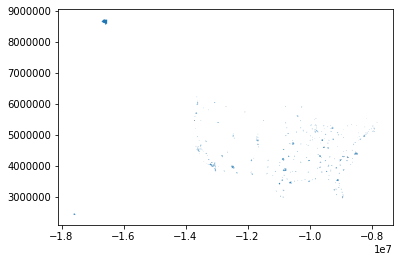

In [11]:
cities = map_df.plot() #not the most intuitive map, but it works. Let's see what locations are represented.

In [12]:
my_tab = pd.crosstab(index=map_df["ST"],  # Make a crosstab of all states represented here and name the count column
                              columns="count")
my_tab

col_0,count
ST,
AK,1
AL,6
AR,5
AZ,12
CA,121
CO,14
CT,8
DC,1
DE,1


To check out when you have the time:

https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/clip-vector-data-in-python-geopandas-shapely/

https://matthewrocklin.com/blog/work/2017/09/21/accelerating-geopandas-1

In [13]:
map_df['CityFIPS_Int'] = map_df['STPLFIPS'].astype(int)
map_df['CityFIPS_Int'] #creating CityFIPS variable for attachment

0      4857200
1      4845384
2      4822660
3      4841464
4      4848768
        ...   
495    2758000
496    5531000
497    5010675
498     203000
499      15003
Name: CityFIPS_Int, Length: 500, dtype: int32

In [14]:
#joining the geodataframe with the mapped data, now that I've (bulkily) created a new integer variable

merged = map_df.merge(data_500_cities, on='CityFIPS_Int')
merged.head()

,NAME,CLASS,ST,STFIPS,PLACEFIPS,POP2010,STPLFIPS,geometry,CityFIPS_Int,UniqueID,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
0,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486...",4857200,4857200-48215021303,CrdPrv,Pharr,TX,4857200.0,4.821502e+10,9438,"(26.1072024802, -98.2002777217)",17.8,16.5,19.0,8.8,7.9,9.8,13.7,12.8,...,39.3,35.8,34.2,37.3,22.7,16.6,29.9,21.1,15.9,27.3,80.0,76.7,83.2,16.4,14.4,18.3,35.5,33.8,37.1,3.2,2.8,3.6,17.2,10.6,23.4
1,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486...",4857200,4857200,CrdPrv,Pharr,TX,4857200.0,NaN,70400,"(26.168815399, -98.1904720704)",19.6,19.2,20.0,8.3,8.0,8.7,13.6,13.3,...,34.6,34.3,33.7,34.9,27.8,25.8,29.9,24.9,23.4,26.5,80.6,79.5,81.8,15.5,14.8,16.2,34.2,33.6,34.8,3.5,3.3,3.7,16.4,14.4,18.2
2,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486...",4857200,4857200-48215021302,CrdPrv,Pharr,TX,4857200.0,4.821502e+10,15479,"(26.1332468626, -98.1960078551)",18.3,17.1,19.5,9.3,8.2,10.3,13.0,12.0,...,43.0,38.0,36.2,39.6,21.1,15.7,27.9,19.1,14.7,24.2,79.8,76.4,83.2,18.2,15.8,20.4,36.7,34.8,38.5,3.6,3.1,4.0,21.2,14.5,27.9
3,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486...",4857200,4857200-48215021701,CrdPrv,Pharr,TX,4857200.0,4.821502e+10,9945,"(26.2274316496, -98.1890828934)",16.7,15.7,17.7,7.7,6.9,8.6,15.4,14.5,...,31.3,31.5,29.8,32.9,31.2,26.1,36.0,28.7,24.6,32.8,81.4,78.3,84.5,12.5,10.8,14.0,33.2,31.3,34.8,2.7,2.4,3.0,14.0,9.9,18.5
4,Pharr,city,TX,48,57200,70400,4857200,"POLYGON ((-10929531.239 3029892.718, -10929486...",4857200,4857200-48215021600,CrdPrv,Pharr,TX,4857200.0,4.821502e+10,3595,"(26.2016005293, -98.1804645174)",23.9,22.7,25.2,8.9,8.1,9.9,11.4,10.7,...,44.6,38.0,36.7,39.4,21.3,16.3,27.1,18.9,14.7,23.6,79.2,76.5,82.4,19.8,17.8,22.0,35.4,34.0,36.8,4.9,4.4,5.5,21.2,14.5,28.1


In [15]:
# and now, for the info behind the variables
merged.count() #number of non-missing observations

NAME                    28504
CLASS                   28504
ST                      28504
STFIPS                  28504
PLACEFIPS               28504
                        ...  
Low_CL.Stroke           27710
High_CL.Stroke          27710
Data_Value.TeethLost    27650
Low_CL.TeethLost        27650
High_CL.TeethLost       27650
Length: 101, dtype: int64

In [16]:
merged.describe()

,POP2010,CityFIPS_Int,CityFIPS,TractFIPS,PopCount,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cholesterol,Low_CL.Cholesterol,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
count,2.850400e+04,2.850400e+04,2.850400e+04,2.800400e+04,2.850400e+04,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,...,27710.000000,27710.000000,27710.000000,27710.000000,27607.000000,27607.000000,27607.000000,27601.000000,27601.000000,27601.000000,25461.000000,25461.000000,25461.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27710.000000,27650.000000,27650.000000,27650.000000
mean,1.177107e+06,2.610112e+06,2.610112e+06,2.593797e+10,7.228514e+03,22.339856,21.317257,23.376034,9.691703,9.109617,10.382811,17.643096,17.027809,18.258473,5.808971,5.307936,6.352299,6.315781,5.531029,7.179033,5.501685,5.277026,5.735366,72.628199,70.526261,...,27.927726,30.073006,28.848917,31.251920,31.702271,26.696783,36.757790,29.857632,25.704366,34.030024,83.082137,80.846876,85.120910,12.751620,11.517456,14.074262,36.693999,35.299924,38.031306,3.228542,2.893807,3.600949,16.078879,11.549725,21.424307
std,2.158800e+06,1.685766e+06,1.685766e+06,1.675674e+10,6.613440e+04,6.367835,6.122930,6.609925,1.850531,1.692989,2.038548,4.128218,4.030984,4.233208,2.076700,1.876207,2.302763,2.438173,2.201549,2.700337,1.765589,1.654782,1.884887,8.366756,8.838227,...,9.644283,8.192414,8.093009,8.259684,8.033933,7.315585,8.643456,7.158035,6.638605,7.584085,3.110090,3.468623,2.823468,4.108038,3.843653,4.370158,5.932733,5.947712,5.888314,1.530893,1.365391,1.717142,8.728623,7.151019,10.193585
min,4.241700e+04,1.500300e+04,1.500300e+04,1.073000e+09,1.000000e+00,2.000000,1.700000,2.200000,5.100000,4.400000,5.700000,2.700000,2.400000,3.000000,0.300000,0.200000,0.400000,1.100000,0.700000,1.400000,0.600000,0.500000,0.600000,21.700000,18.600000,...,7.600000,9.100000,8.100000,10.200000,11.900000,8.300000,15.400000,9.600000,5.400000,14.800000,63.400000,57.100000,68.500000,3.200000,2.400000,3.700000,16.100000,13.500000,19.800000,0.200000,0.100000,0.200000,2.800000,1.400000,4.100000
25%,1.190970e+05,6.813440e+05,6.813440e+05,8.001009e+09,2.372000e+03,18.000000,17.100000,18.900000,8.300000,7.900000,8.900000,15.000000,14.400000,15.600000,4.500000,4.100000,4.900000,4.600000,3.900000,5.300000,4.300000,4.200000,4.500000,67.700000,65.400000,...,20.300000,24.000000,22.800000,25.200000,25.400000,21.000000,29.900000,24.300000,20.600000,28.100000,81.300000,78.900000,83.500000,9.600000,8.600000,10.800000,32.400000,31.000000,33.700000,2.200000,2.000000,2.500000,9.200000,5.900000,13.400000
50%,2.917070e+05,2.622000e+06,2.622000e+06,2.608100e+10,3.586000e+03,21.800000,20.800000,22.900000,9.300000,8.800000,10.000000,17.300000,16.800000,17.900000,5.600000,5.100000,6.100000,5.900000,5.100000,6.700000,5.300000,5.100000,5.500000,73.300000,71.300000,...,26.600000,29.100000,27.800000,30.300000,32.000000,26.900000,37.100000,29.900000,25.700000,34.100000,83.400000,81.300000,85.400000,12.100000,10.900000,13.400000,36.100000,34.700000,37.400000,2.900000,2.600000,3.200000,14.100000,9.700000,19.400000
75%,8.052350e+

Now that I have my joined geodataframe, now I'm going to set up matplotlib to properly map the variables. 
(This would have looked cooler/more useful if I clipped the shapefile down to individual observations...)

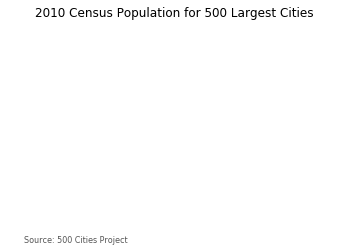

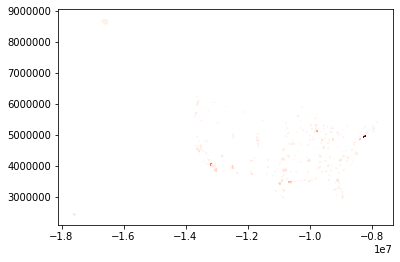

In [17]:
#mapping 2010 population (for now)
variable = merged['POP2010']
#vmin,vmax = 0, 8175133
#fig, ax = plt.subplots(1, figsize=(10, 6))
fig,ax = plt.subplots(1)

ax.axis('off')# remove the axis

# # add a title
ax.set_title('2010 Census Population for 500 Largest Cities', fontdict={'fontsize': '12', 'fontweight' : '1'})

# # create an annotation for the data source
ax.annotate('Source: 500 Cities Project',xy=(0.05, 0.02), horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')

# create map
#merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax)
merged.plot(column=variable, cmap='Reds', linewidth=0.8)

In [18]:
## I can see the data mapped here (barely) -- BUT we need to clip the shapefile down to get something more meaningful.
    # This will happen with earthpy when I get the chance to do so.